In [ ]:
import pandas as pd
import os
import kagglehub
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Download Dataset

In [ ]:
# Download latest version
path = kagglehub.dataset_download("meetnagadia/human-action-recognition-har-dataset")

print("Path to dataset files:", path)

100%|██████████| 297M/297M [00:01<00:00, 188MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/meetnagadia/human-action-recognition-har-dataset/versions/1


In [ ]:
file_path = os.path.join(path, "Human Action Recognition/Training_set.csv")  # Ganti "nama_file.csv" dengan nama file yang sesuai
data = pd.read_csv(file_path)

# Tampilkan data
print("Data:")
print(data.head())

Data:
      filename         label
0  Image_1.jpg       sitting
1  Image_2.jpg  using_laptop
2  Image_3.jpg       hugging
3  Image_4.jpg      sleeping
4  Image_5.jpg  using_laptop


In [ ]:
print("Isi folder dataset:", os.listdir(path))
subfolder_path = os.path.join(path, 'Human Action Recognition')
print("Isi folder dataset:", os.listdir(subfolder_path))

Isi folder dataset: ['Human Action Recognition']
Isi folder dataset: ['Testing_set.csv', 'Training_set.csv', 'train', 'test']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  12600 non-null  object
 1   label     12600 non-null  object
dtypes: object(2)
memory usage: 197.0+ KB


#Preprocess Data Gambar menjadi Array

In [ ]:
train_images_path = os.path.join(path, 'Human Action Recognition', 'train')


file_path = os.path.join(path, "Human Action Recognition/Training_set.csv")  # Ganti "nama_file.csv" dengan nama file yang sesuai
train_labels = pd.read_csv(file_path)

# Tampilkan train_labels
print("train_labels:")
print(train_labels.head())

img_size = (275, 183)

def preprocess_image(img_path):
    # Memuat gambar
    img = load_img(img_path, target_size=img_size)
    # Mengubah gambar menjadi array numpy
    img_array = img_to_array(img)
    # Normalisasi nilai piksel menjadi [0, 1]
    img_array = img_array / 255.0
    return img_array


train_images = []
train_labels_list = []


for idx, row in train_labels.iterrows():
    img_path = os.path.join(train_images_path, row['filename'])  # Pastikan kolomnya benar
    img_array = preprocess_image(img_path)
    train_images.append(img_array)
    train_labels_list.append(row['label'])  # Pastikan kolomnya benar

# Konversi ke numpy array
train_images = np.array(train_images)
train_labels = np.array(train_labels_list)

train_labels:
      filename         label
0  Image_1.jpg       sitting
1  Image_2.jpg  using_laptop
2  Image_3.jpg       hugging
3  Image_4.jpg      sleeping
4  Image_5.jpg  using_laptop


In [ ]:
print(train_images)

[[[[0.8980392  0.6313726  0.3372549 ]
   [0.9098039  0.6509804  0.3529412 ]
   [0.84705883 0.6156863  0.31764707]
   ...
   [0.14509805 0.00392157 0.00392157]
   [0.13333334 0.         0.02352941]
   [0.13333334 0.         0.03137255]]

  [[0.8980392  0.6313726  0.3372549 ]
   [0.9098039  0.6509804  0.3529412 ]
   [0.84705883 0.6156863  0.31764707]
   ...
   [0.14509805 0.00392157 0.00392157]
   [0.13333334 0.         0.02352941]
   [0.13333334 0.         0.03137255]]

  [[0.8627451  0.61960787 0.3254902 ]
   [0.8666667  0.63529414 0.3372549 ]
   [0.85490197 0.6431373  0.36078432]
   ...
   [0.14117648 0.00784314 0.00392157]
   [0.12941177 0.         0.01568628]
   [0.1254902  0.         0.01960784]]

  ...

  [[0.39607844 0.57254905 0.7372549 ]
   [0.43529412 0.6117647  0.77254903]
   [0.43529412 0.627451   0.78431374]
   ...
   [0.7647059  0.5686275  0.43137255]
   [0.75686276 0.56078434 0.42352942]
   [0.7529412  0.5568628  0.41960785]]

  [[0.40784314 0.58431375 0.7490196 ]
   [0.4

In [ ]:
# Membuat DataFrame dari train_labels dan metadata gambar
data = {
    "label": train_labels_list,  # Label dari gambar
    "image_array": [img for img in train_images],  # Menyimpan array gambar
}
train_df = pd.DataFrame(data)

# Tampilkan DataFrame
print(train_df.head())

          label                                        image_array
0       sitting  [[[0.8980392, 0.6313726, 0.3372549], [0.909803...
1  using_laptop  [[[0.972549, 0.972549, 0.972549], [0.972549, 0...
2       hugging  [[[0.9882353, 0.9882353, 0.9882353], [0.988235...
3      sleeping  [[[0.60784316, 0.6627451, 0.6745098], [0.61568...
4  using_laptop  [[[0.6039216, 0.5803922, 0.5254902], [0.6, 0.5...


In [ ]:
train_df.info()
print("Labels from DataFrame:")
print(train_df['label'].unique())  # Menampilkan label unik
print(train_df['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   label        12600 non-null  object
 1   image_array  12600 non-null  object
dtypes: object(2)
memory usage: 197.0+ KB
Labels from DataFrame:
['sitting' 'using_laptop' 'hugging' 'sleeping' 'drinking' 'clapping'
 'dancing' 'cycling' 'calling' 'laughing' 'eating' 'fighting'
 'listening_to_music' 'running' 'texting']
label
sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: count, dtype: int64


In [ ]:
selected_labels = ['sitting', 'sleeping', 'laughing', 'fighting']

filtered_df = train_df[train_df['label'].isin(selected_labels)]

filtered_train_images = filtered_df['image_array'].to_numpy()
filtered_train_labels = filtered_df['label'].to_numpy()

In [ ]:
filtered_train_images = np.stack(filtered_train_images)

print(filtered_train_images)

[[[[0.8980392  0.6313726  0.3372549 ]
   [0.9098039  0.6509804  0.3529412 ]
   [0.84705883 0.6156863  0.31764707]
   ...
   [0.14509805 0.00392157 0.00392157]
   [0.13333334 0.         0.02352941]
   [0.13333334 0.         0.03137255]]

  [[0.8980392  0.6313726  0.3372549 ]
   [0.9098039  0.6509804  0.3529412 ]
   [0.84705883 0.6156863  0.31764707]
   ...
   [0.14509805 0.00392157 0.00392157]
   [0.13333334 0.         0.02352941]
   [0.13333334 0.         0.03137255]]

  [[0.8627451  0.61960787 0.3254902 ]
   [0.8666667  0.63529414 0.3372549 ]
   [0.85490197 0.6431373  0.36078432]
   ...
   [0.14117648 0.00784314 0.00392157]
   [0.12941177 0.         0.01568628]
   [0.1254902  0.         0.01960784]]

  ...

  [[0.39607844 0.57254905 0.7372549 ]
   [0.43529412 0.6117647  0.77254903]
   [0.43529412 0.627451   0.78431374]
   ...
   [0.7647059  0.5686275  0.43137255]
   [0.75686276 0.56078434 0.42352942]
   [0.7529412  0.5568628  0.41960785]]

  [[0.40784314 0.58431375 0.7490196 ]
   [0.4

#Ekstrak Fitur menggunakan VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load model VGG16 pretrained, tanpa lapisan top (hanya ekstraktor fitur)
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(275, 183, 3))

# Preprocess gambar sesuai format model
processed_images = preprocess_input(filtered_train_images)

# Ekstraksi fitur
features = vgg_model.predict(processed_images)

print("Shape of extracted features:", features.shape)

105/105 [==============================] - 59s 560ms/step
Shape of extracted features: (3360, 8, 5, 512)


In [ ]:
print(features)

[[[[0.        0.        0.        ... 0.        1.3775024 0.       ]
   [0.        0.        0.        ... 0.        0.        0.       ]
   [0.        0.        0.        ... 0.        0.        0.       ]
   [0.        0.        0.        ... 0.        0.        0.       ]
   [0.        0.        0.        ... 0.        0.        0.       ]]

  [[0.        0.        0.        ... 0.        0.        0.       ]
   [0.        0.        0.        ... 0.        0.        0.       ]
   [0.        0.        0.        ... 0.        0.        0.       ]
   [0.        0.        0.        ... 0.        0.        0.       ]
   [0.        0.        0.        ... 0.        0.        0.       ]]

  [[0.        0.        0.        ... 0.        0.        0.       ]
   [0.        0.        0.        ... 0.        0.        0.       ]
   [0.        0.        0.        ... 0.        0.        0.       ]
   [0.        0.        0.        ... 0.        0.        0.       ]
   [0.        0.        0.    

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D

# Pooling untuk mengubah fitur ke vektor 1D
global_avg_pool = GlobalAveragePooling2D()
flattened_features = global_avg_pool(features).numpy()

# Buat DataFrame dari fitur
features_df = pd.DataFrame(flattened_features)
features_df['label'] = filtered_df['label'].reset_index(drop=True)

# Tampilkan DataFrame fitur
print(features_df.head())

     0    1    2    3    4    5    6    7    8    9  ...  503  504  505  506  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   507  508  509       510  511     label  
0  0.0  0.0  0.0  0.034438  0.0   sitting  
1  0.0  0.0  0.0  0.029706  0.0  sleeping  
2  0.0  0.0  0.0  0.032497  0.0  sleeping  
3  0.0  0.0  0.0  0.027347  0.0  sleeping  
4  0.0  0.0  0.0  0.027294  0.0  laughing  

[5 rows x 513 columns]


In [ ]:
features.shape

(3360, 8, 5, 512)

In [ ]:
print(filtered_train_images.shape)
print(filtered_train_labels.shape)
features_df.info()

(3360, 275, 183, 3)
(3360,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Columns: 513 entries, 0 to label
dtypes: float32(512), object(1)
memory usage: 6.6+ MB


#Preprocess Label

In [ ]:
X = features_df.iloc[:, :-1].values  # Semua kolom kecuali kolom terakhir (label)
y = features_df['label'].values  # Kolom label

print("Shape of features (X):", X.shape)
print("Shape of labels (y):", y.shape)

Shape of features (X): (3360, 512)
Shape of labels (y): (3360,)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# Encode label menjadi nilai numerik
y_encoded = label_encoder.fit_transform(y)

# Tampilkan hasil encoding
print("Encoded labels:")
print(y_encoded[:10])  # Contoh hasil encoding pertama

# Mapping antara label asli dan nilai numeriknya
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label mapping (original to numeric):", label_mapping)


Encoded labels:
[2 3 3 3 1 0 1 2 2 3]
Label mapping (original to numeric): {'fighting': 0, 'laughing': 1, 'sitting': 2, 'sleeping': 3}


In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# Encode label menjadi nilai numerik
y_encoded = label_encoder.fit_transform(filtered_train_labels)

# Convert menjadi one-hot encoding
y_one_hot = to_categorical(y_encoded)

# Tampilkan hasil one-hot encoding untuk beberapa data pertama
print("One-hot encoded labels:")
print(y_one_hot[:10])  # Menampilkan 10 data pertama

# Mapping antara label asli dan one-hot encoding
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label mapping (original to one-hot):", label_mapping)


One-hot encoded labels:
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
Label mapping (original to one-hot): {'fighting': 0, 'laughing': 1, 'sitting': 2, 'sleeping': 3}


#Mengurangi fitur

In [ ]:
from sklearn.decomposition import PCA

# Dataset hasil VGG16
print(X.shape)  # Pastikan X memiliki dimensi (3360, 512)

pca = PCA(n_components=6)
X_reduced = pca.fit_transform(X)

print(X_reduced.shape)  # Output: (3360, 6)

(3360, 512)
(3360, 6)


#Membagi data menjadi train dan test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_one_hot, test_size=0.2, random_state=42)

# Menampilkan ukuran data yang dibagi
print(f"Train Data: {X_train.shape}, Test Data: {X_test.shape}")

Train Data: (2688, 6), Test Data: (672, 6)


#Algoritma Backpropagation

###ReLu

In [ ]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

###Softmax

In [ ]:
def softmax(x):
    exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))  # Untuk stabilitas numerik
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)

def softmax_derivative(x):
    return x * (1 - x)

###CrossEntropy Loss (Loss Function)

In [ ]:
def cross_entropy_loss(y_true, y_pred):
    # Menghitung Cross-Entropy Loss
    m = y_true.shape[0]
    # Menambahkan epsilon untuk menghindari log(0)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.sum(y_true * np.log(y_pred + epsilon)) / m

###Forward Pass

In [ ]:
def feedforward(X, weights, biases):
    layer_outputs = [X]  # Output setiap layer (mulai dari input)
    for w, b in zip(weights[:-1], biases[:-1]):
        X = relu(np.dot(X, w) + b)  # Aktivasi untuk hidden layer
        layer_outputs.append(X)
    # Output layer menggunakan Softmax
    output = softmax(np.dot(layer_outputs[-1], weights[-1]) + biases[-1])
    layer_outputs.append(output)
    return layer_outputs

###Backpropagation

In [ ]:
def backpropagation(y_true, layer_outputs, weights, biases, learning_rate):
    # Inisialisasi gradien
    deltas = []

    # Menghitung error pada output layer (menggunakan turunan Softmax dan Cross-Entropy)
    errors = y_true - layer_outputs[-1]
    delta = errors  # Turunan softmax untuk output layer
    deltas.append(delta)

    # Perhitungan gradien untuk hidden layers
    for i in reversed(range(len(weights) - 1)):
        error = np.dot(deltas[-1], weights[i + 1].T)
        delta = error * relu_derivative(layer_outputs[i + 1])  # Menggunakan relu untuk hidden layer
        deltas.append(delta)

    deltas.reverse()  # Urutan delta harus dari input -> output

    # Update bobot dan bias berdasarkan gradien
    for i in range(len(weights)):
        weights[i] += np.dot(layer_outputs[i].T, deltas[i]) * learning_rate
        biases[i] += np.sum(deltas[i], axis=0) * learning_rate

    return weights, biases

###Hyperparameter

In [ ]:
input_dim = 6   # Jumlah fitur
hidden_dim = 64  # Jumlah neuron hidden layer
output_dim = 4   # Jumlah kelas (sesuaikan dengan hasil label encoder)
learning_rate = 0.0001
epochs = 1000

###Alur Algoritma Training

In [ ]:
# Inisialisasi He untuk ReLU
def he_initialization(input_dim, output_dim):
    return np.random.randn(input_dim, output_dim) * np.sqrt(2. / input_dim)

# Inisialisasi bobot dan bias untuk 2 hidden layers dengan He initialization
weights = [
    he_initialization(input_dim, hidden_dim),  # Bobot lapisan pertama
    he_initialization(hidden_dim, hidden_dim),  # Bobot lapisan kedua
    he_initialization(hidden_dim, output_dim)   # Bobot output layer
]
biases = [
    np.zeros(hidden_dim),  # Bias lapisan pertama
    np.zeros(hidden_dim),  # Bias lapisan kedua
    np.zeros(output_dim)   # Bias output layer
]

losses = []

# Training loop
for epoch in range(epochs):
    # Forward pass
    layer_outputs = feedforward(X_train, weights, biases)

    # Backpropagation
    weights, biases = backpropagation(y_train, layer_outputs, weights, biases, learning_rate)

    # Calculate loss
    loss = cross_entropy_loss(y_train, layer_outputs[-1])
    losses.append(loss)
    if (epoch + 1) % 100 == 0:
      print(f"Epoch {epoch+1}, Loss: {loss:.4f}")

# Evaluasi akhir
print("Training selesai!")


Epoch 100, Loss: 1.2011
Epoch 200, Loss: 1.1873
Epoch 300, Loss: 1.1786
Epoch 400, Loss: 1.1719
Epoch 500, Loss: 1.1664
Epoch 600, Loss: 1.1617
Epoch 700, Loss: 1.1574
Epoch 800, Loss: 1.1537
Epoch 900, Loss: 1.1502
Epoch 1000, Loss: 1.1470
Training selesai!


In [ ]:
print(layer_outputs[-1])

[[0.16414202 0.48640532 0.24195459 0.10749807]
 [0.25829248 0.30922949 0.1822173  0.25026074]
 [0.12544795 0.27471736 0.43445657 0.16537813]
 ...
 [0.28635208 0.04871416 0.45395895 0.21097481]
 [0.10718289 0.40529914 0.0842811  0.40323687]
 [0.07203333 0.50834278 0.15707822 0.26254567]]


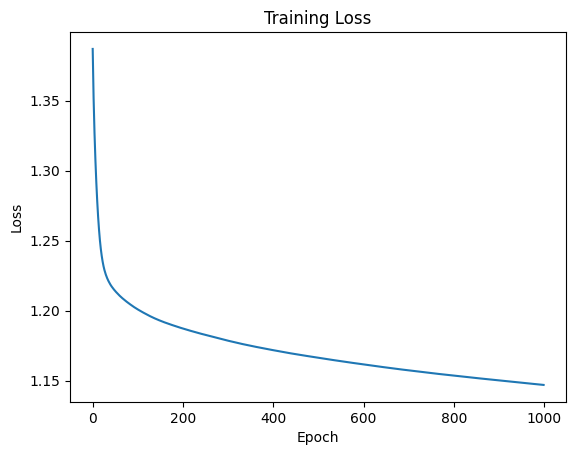

In [ ]:
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [ ]:
def calculate_accuracy(y_true, y_pred):

    y_true_classes = np.argmax(y_true, axis=1)
    y_pred_classes = np.argmax(y_pred, axis=1)
    accuracy = np.mean(y_pred_classes == y_true_classes)
    return accuracy

accuracy = calculate_accuracy(y_train, layer_outputs[-1])
print(f"Akurasi: {accuracy:.2%}")

Akurasi: 48.33%



Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.50      0.51       674
           1       0.50      0.55      0.52       690
           2       0.46      0.51      0.48       654
           3       0.47      0.37      0.42       670

    accuracy                           0.48      2688
   macro avg       0.48      0.48      0.48      2688
weighted avg       0.48      0.48      0.48      2688



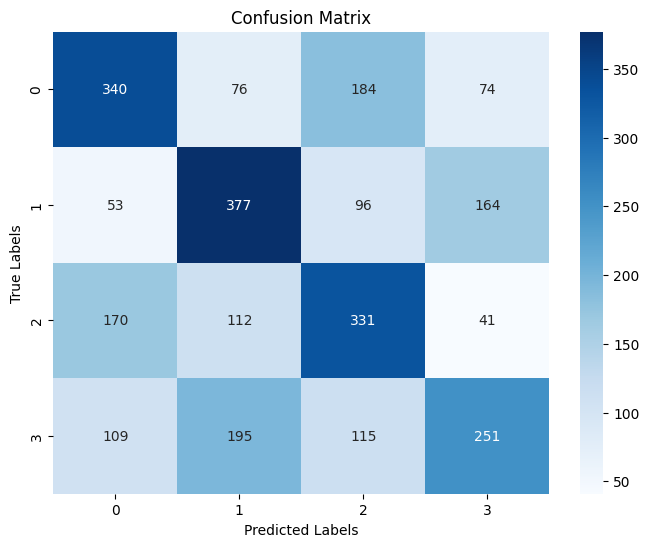

In [ ]:
final_output = layer_outputs[-1]
y_pred = np.argmax(final_output, axis=1)  # Prediksi kelas
y_true = np.argmax(y_train, axis=1)     # Label sebenarnya

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(output_dim), yticklabels=range(output_dim))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

#Testing

In [ ]:
test_output = feedforward(X_test, weights, biases)

accuracy_test = calculate_accuracy(y_test, test_output[-1])
print(f"Akurasi: {accuracy_test:.2%}")

Akurasi: 46.43%



Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.47      0.47       166
           1       0.43      0.51      0.47       150
           2       0.51      0.55      0.53       186
           3       0.43      0.32      0.37       170

    accuracy                           0.46       672
   macro avg       0.46      0.46      0.46       672
weighted avg       0.46      0.46      0.46       672



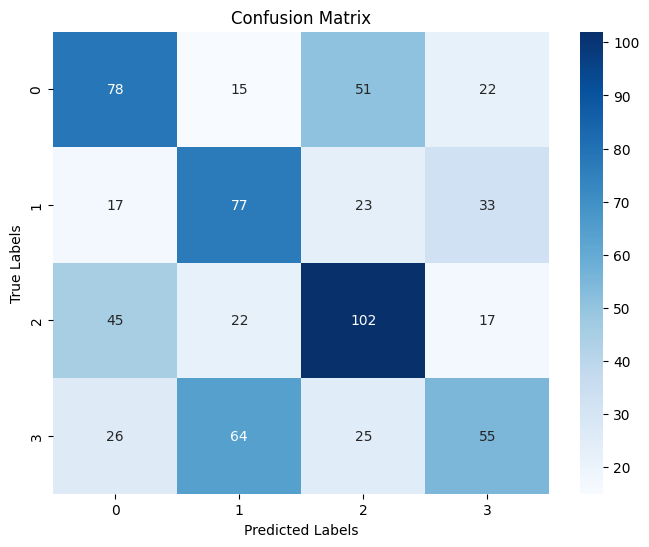

In [ ]:
final_output = test_output[-1]
y_pred_test = np.argmax(final_output, axis=1)  # Prediksi kelas
y_true_test = np.argmax(y_test, axis=1)     # Label sebenarnya

# Classification report
print("\nClassification Report:")
print(classification_report(y_true_test, y_pred_test))

# Confusion matrix
conf_matrix = confusion_matrix(y_true_test, y_pred_test)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(output_dim), yticklabels=range(output_dim))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()